In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('heights.csv')
data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


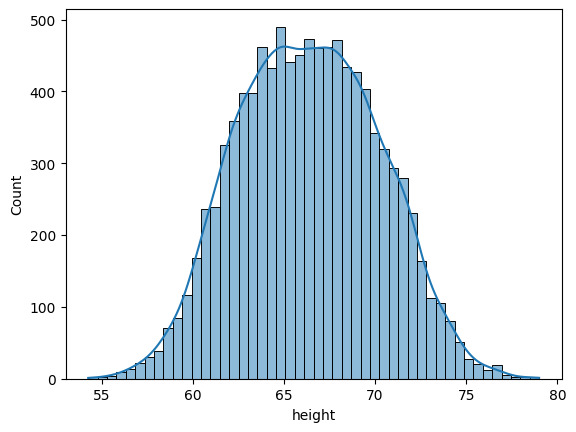

In [3]:
import seaborn as sns
sns.histplot(x=data['height'],kde=True)
plt.show()

In [4]:
data.height.mean()

66.367559754866

In [5]:
data.height.std()

3.847528120795573

In [6]:
####The mean of height is around 66 and the sd of mean is 3.84

### Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [9]:
upper_limit=data.height.mean()+3*data.height.std()
lower_limit=data.height.mean()-3*data.height.std()

In [10]:
####remove outliers which 3 sd's away from the mean from either side:

In [11]:
data[(data.height>upper_limit)|(data.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [12]:
data.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [13]:
#### we remove outliers from the data,and get a cleaned dataset:
data_no_outliers=data[(data.height<upper_limit)&(data.height>lower_limit)]

In [14]:
data_no_outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Here are the outliers that are beyond 3 std dev from mean-we remove 7 rows with extreme negetive and positive values.

####  Outlier detection and removal using Z Score:

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [19]:
data['z-score']=(data.height - data.height.mean())/data.height.std()

In [20]:
data.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [21]:
data[data['z-score']>3]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [22]:
data[data['z-score']<-3]

,gender,height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
####getting all the outliers in one place:
data[(data['z-score']<-3)|(data['z-score']>3)]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [24]:
####remove the outliers:
data_with_no_outliers=data[(data['z-score']>-3)&(data['z-score']<3)]
data_with_no_outliers

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [25]:
data_with_no_outliers.shape

(9993, 3)